In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns

['job_skills.csv']


In [2]:
data_df = pd.read_csv('../input/job_skills.csv')
data_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [3]:
data_df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


In [4]:
data_df.isnull().sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

In [5]:
data_df.dropna(inplace=True)

In [6]:
data_df['country'] = data_df['Location'].apply(lambda x:x.split(',')[-1])
data_df['country'] = data_df['country'].apply(lambda y:y.replace(' ',''))
data_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


In [7]:
data_df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
Partner Sales Engineer, Google Cloud           7
Recruiter                                      7
User Experience Design Intern, Summer 2018     7
Name: Title, dtype: int64

In [8]:
data_df.country.value_counts()[:10]

UnitedStates     624
Ireland           87
UnitedKingdom     62
Germany           53
Singapore         41
China             38
Australia         35
Japan             31
Taiwan            30
India             28
Name: country, dtype: int64

In [9]:
top10country = data_df.country.value_counts()[:10].index.tolist()
top10country

['UnitedStates',
 'Ireland',
 'UnitedKingdom',
 'Germany',
 'Singapore',
 'China',
 'Australia',
 'Japan',
 'Taiwan',
 'India']

In [10]:
top10country_df = data_df.loc[data_df['country'].isin(top10country)]
top10country_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


In [11]:
top10country_title = top10country_df.Title.value_counts()[:10].index.tolist()
top10country_title_df = top10country_df.loc[top10country_df['Title'].isin(top10country_title)]
top10country_title_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
11,Google,Partner Onboarding Manager (Americas),Partnerships,"Seattle, WA, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
56,Google,Partner Onboarding Manager (Americas),Partnerships,"Sunnyvale, CA, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
218,Google,Partner Onboarding Manager (Americas),Partnerships,"New York, NY, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
305,Google,Partner Onboarding Manager (Americas),Partnerships,"Seattle, WA, United States",Serve as point of contact for Partners and man...,Bachelor's degree or equivalent practical expe...,Master's degree in technical field (Computer S...,UnitedStates
315,Google,"Field Sales Representative, Google Cloud",Sales & Account Management,"Minneapolis, MN, United States",Build and maintain executive relationships wit...,BA/BS degree or equivalent practical experienc...,10 years of experience selling IaaS or PaaS wi...,UnitedStates


In [12]:
country_title = top10country_title_df.pivot_table(index=['country'], columns=['Title'], values=['Company'], aggfunc='count')
country_title

Company            ...                                       
Title         BOLD Intern, Summer 2018            ...             User Experience Researcher
country                                           ...                                       
China                              NaN            ...                                    NaN
Germany                            NaN            ...                                    NaN
India                              NaN            ...                                    NaN
Ireland                            NaN            ...                                    NaN
Singapore                          NaN            ...                                    NaN
Taiwan                             NaN            ...                                    NaN
UnitedKingdom                      NaN            ...                                    NaN
UnitedStates                      21.0            ...                                    9.0

[8 rows x 10 columns]

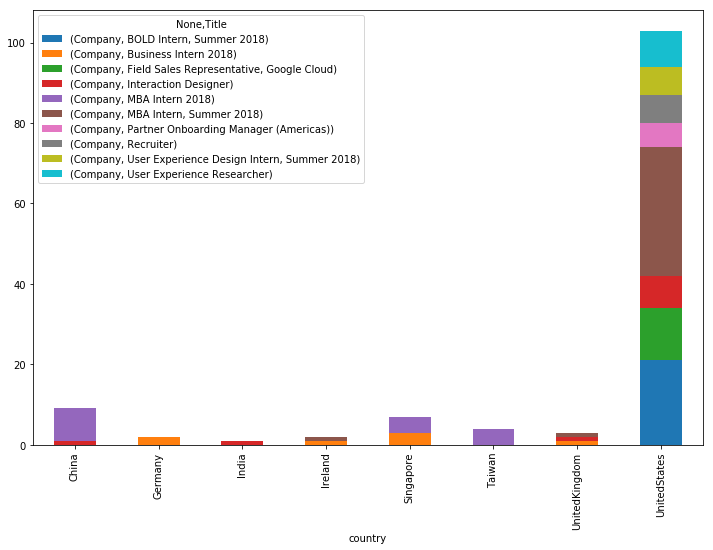

In [13]:
country_title.plot(kind='bar', stacked=True, figsize=(12,8))

need to plot by single country to find the top10 title

In [14]:
def country_title_plot(country):
    country_df = data_df[data_df['country']==country]
    title = country_df['Title'].value_counts()[:10]
    title.plot(kind='bar')
    plt.title('{} top 10 titles'.format(country))
    plt.show()

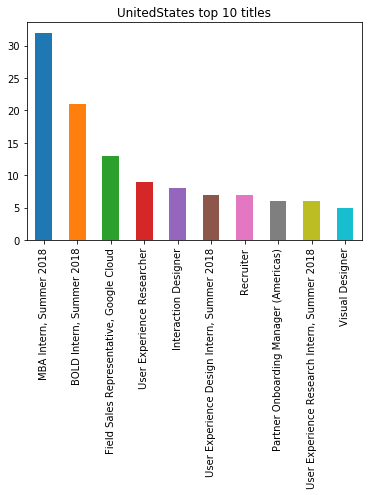

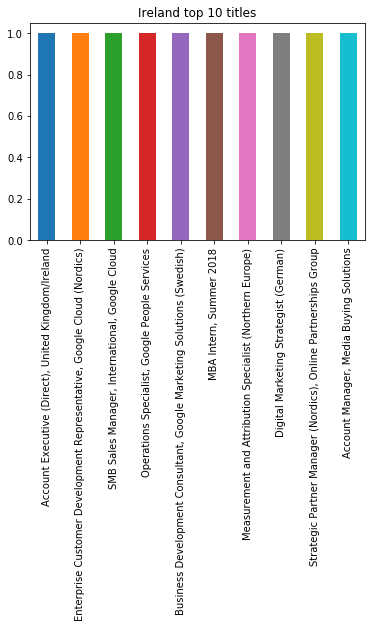

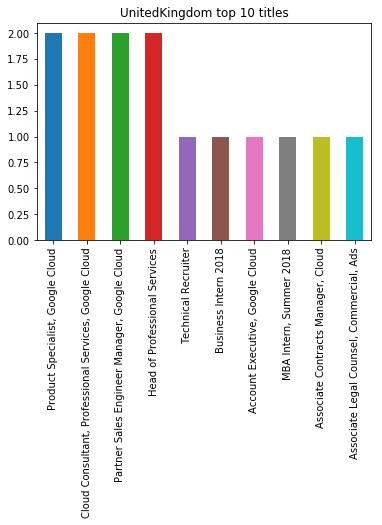

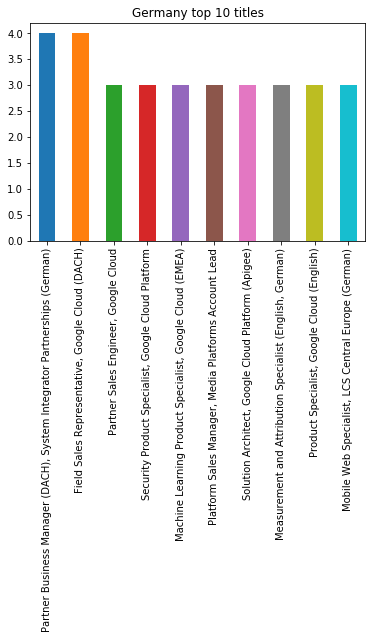

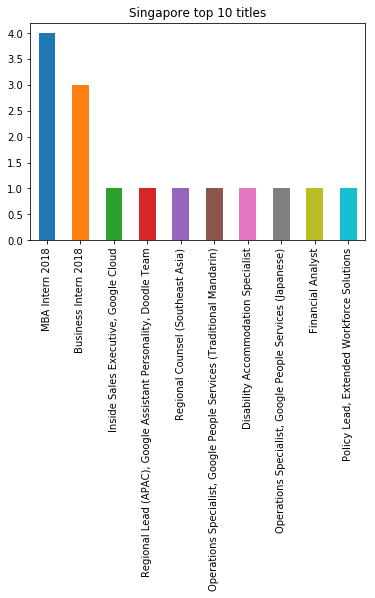

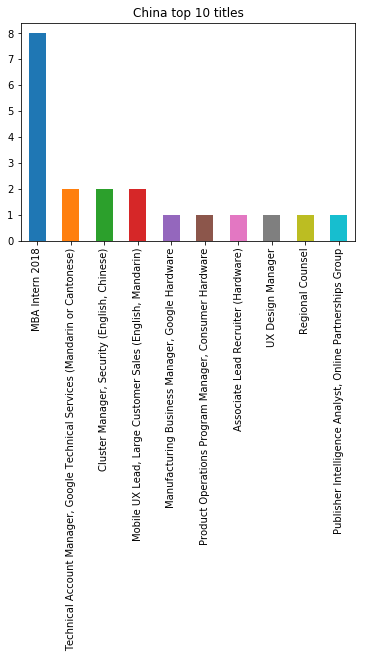

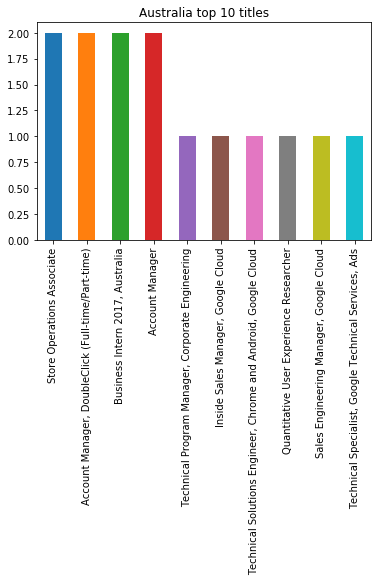

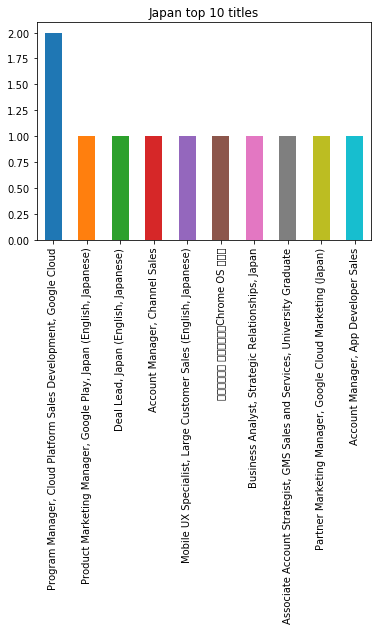

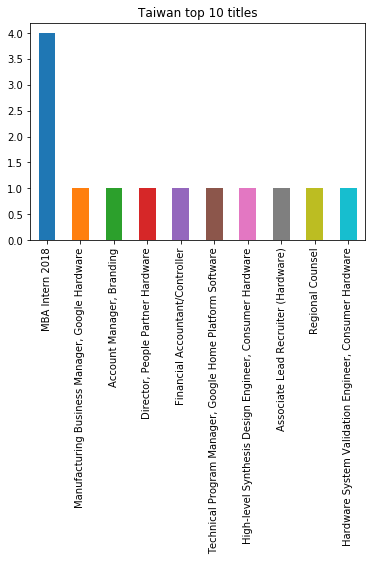

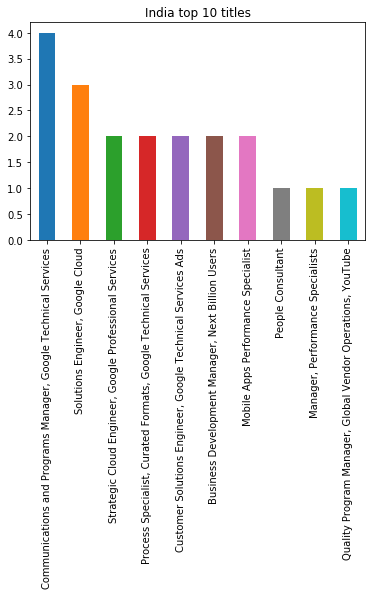

In [15]:
for i in top10country:
    country_title_plot(i)

taiwan -> china

In [16]:
new_df = data_df.copy()
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates


3 ways to change the content in one column. replace in the simplest
```python
new_df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
```

In [17]:
# new_df.loc[new_df.country=='Taiwan', 'country'] = 'China'
# new_df['country'] = new_df['country'].apply(lambda x:'China' if x == 'Taiwan' else x)
new_df['country'].replace('Taiwan', 'China', inplace=True)

In [18]:
new_df.country.value_counts()[:10]

UnitedStates     624
Ireland           87
China             68
UnitedKingdom     62
Germany           53
Singapore         41
Australia         35
Japan             31
India             28
Switzerland       22
Name: country, dtype: int64

In [19]:
# regex to filter the required year of working experience

In [20]:
import re

In [21]:
# new_df['min_year_exp'] = new_df['Minimum Qualifications'].apply(lambda x : re.findall('([0-9]+)', x)) # 2018 2019?
new_df['min_year_exp'] = new_df['Minimum Qualifications'].apply(lambda x : re.findall('([0-9]+) year', x))
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country,min_year_exp
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates,[]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates,[4]


In [22]:
new_df['min_year_exp'] = new_df.min_year_exp.apply(lambda x : [0] if len(x)==0 else x)
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country,min_year_exp
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,[3]
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,[7]
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates,"[2, 1, 1]"
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates,[0]
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates,[4]


In [23]:
new_df['min_year_exp'] = new_df.min_year_exp.apply(lambda x: max(x))
new_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,country,min_year_exp
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,UnitedStates,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",UnitedStates,0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,UnitedStates,4


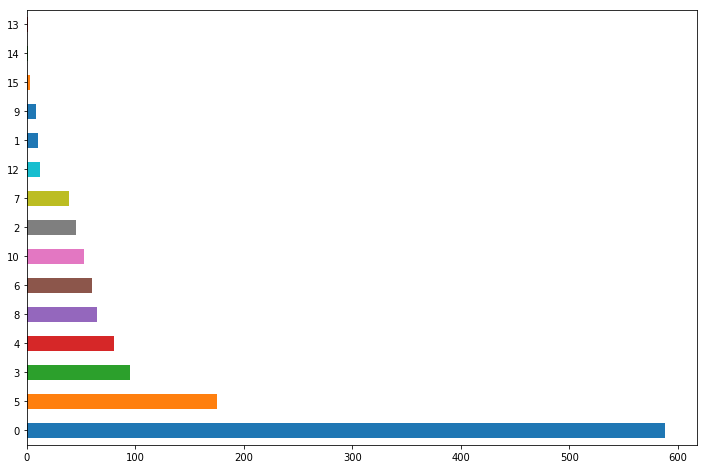

In [24]:
new_df.min_year_exp.value_counts().plot(kind='barh', figsize=(12,8))

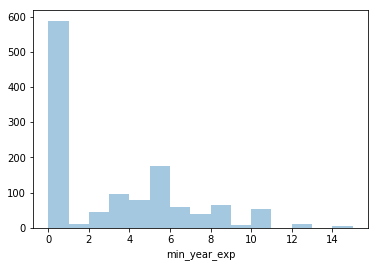

In [25]:
sns.distplot(new_df['min_year_exp'].astype('int'), bins=15, kde=False)

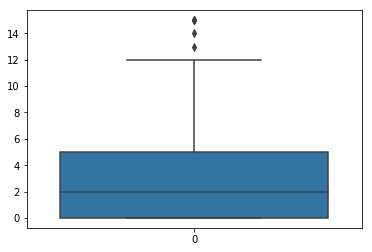

In [26]:
sns.boxplot(data=new_df['min_year_exp'].astype('int'))

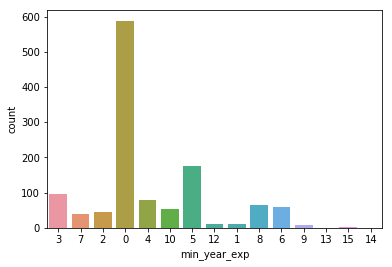

In [27]:
sns.countplot(x=new_df['min_year_exp'])

In [28]:
# degree

In [29]:
degree_list = ['BA', 'BS', 'Bachelor', 'MBA', 'Master', 'PhD']
# count_dict = {(x,0) for x in degree_list}
degree_dict = dict((x,0) for x in degree_list)
degree_dict

{'BA': 0, 'BS': 0, 'Bachelor': 0, 'MBA': 0, 'Master': 0, 'PhD': 0}

In [30]:
for degree in degree_list:
    count = new_df['Minimum Qualifications'].str.contains(degree).sum()
    if degree in degree_list:
        degree_dict[degree] = count
degree_dict

{'BA': 908, 'BS': 878, 'Bachelor': 164, 'MBA': 71, 'Master': 81, 'PhD': 8}

In [31]:
for i in degree_dict.items():
    print(i)
    print(i[0], i[1])

('BA', 908)
BA 908
('BS', 878)
BS 878
('Bachelor', 164)
Bachelor 164
('MBA', 71)
MBA 71
('Master', 81)
Master 81
('PhD', 8)
PhD 8


In [32]:
degree_dict_list = [(i[0], i[1]) for i in degree_dict.items()]
degree_dict_list
# degree_df = pd.DataFrame(degree_dict)
# dict can not be created to df

[('BA', 908),
 ('BS', 878),
 ('Bachelor', 164),
 ('MBA', 71),
 ('Master', 81),
 ('PhD', 8)]

In [33]:
degree_df = pd.DataFrame(degree_dict_list, columns=['degree', 'count'])
# degree_df.set_index('degree', inplace=True) # if no inplace, it doesn't work
degree_df

,degree,count
0,BA,908
1,BS,878
2,Bachelor,164
3,MBA,71
4,Master,81
5,PhD,8


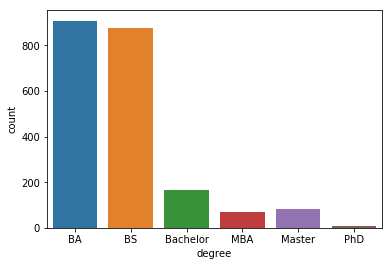

In [34]:
# sns.barplot(x=degree_df.degree, y=degree_df.count)
# TypeError: float() argument must be a string or a number, not 'method'

sns.barplot(x=degree_df.degree, y=degree_df['count']) # sns must set x and y, so shouldn't set_index

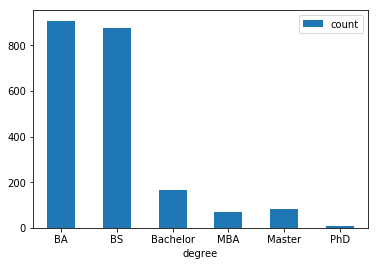

In [35]:
degree_df.set_index('degree', inplace=True) # if no inplace, it doesn't work
degree_df.plot(kind='bar', rot=0) # set_index and plt.plot

In [36]:
# sort a dict

In [37]:
degree_dict.items()

dict_items([('BA', 908), ('BS', 878), ('Bachelor', 164), ('MBA', 71), ('Master', 81), ('PhD', 8)])

In [38]:
for item in degree_dict.items():
    print(item[1])

908
878
164
71
81
8


In [39]:
degree_requirement = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)
degree_requirement
# make a df and plot

[('BA', 908),
 ('BS', 878),
 ('Bachelor', 164),
 ('Master', 81),
 ('MBA', 71),
 ('PhD', 8)]

In [40]:
# programm9ing language

In [41]:
language_list = ['Python', 'Java ', 'C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL', 'Go ']
# Google contains 'Go', so we need to set the key as 'Go '
language_dict = dict((x,0) for x in language_list)
language_dict

{'Python': 0,
 'Java ': 0,
 'C#': 0,
 'PHP': 0,
 'Javascript': 0,
 'Ruby': 0,
 'Perl': 0,
 'SQL': 0,
 'Go ': 0}

In [42]:
for language in language_list:
    count = new_df['Minimum Qualifications'].str.contains(language).sum()
    language_dict[language] = count
language_dict

{'Python': 96,
 'Java ': 10,
 'C#': 15,
 'PHP': 7,
 'Javascript': 3,
 'Ruby': 14,
 'Perl': 6,
 'SQL': 75,
 'Go ': 7}

In [43]:
language_dict_list = [(i[0], i[1]) for i in language_dict.items()]
language_dict_list

[('Python', 96),
 ('Java ', 10),
 ('C#', 15),
 ('PHP', 7),
 ('Javascript', 3),
 ('Ruby', 14),
 ('Perl', 6),
 ('SQL', 75),
 ('Go ', 7)]

In [44]:
language_df = pd.DataFrame(language_dict_list, columns=['language', 'count'])
language_df

,language,count
0,Python,96
1,Java,10
2,C#,15
3,PHP,7
4,Javascript,3
5,Ruby,14
6,Perl,6
7,SQL,75
8,Go,7


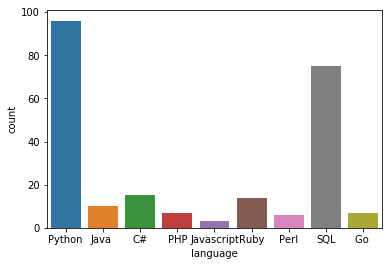

In [45]:
# sns.barplot(language_df[language], language_df[count])
# KeyError: 'Go '
language_df['language'].replace(' ','', inplace=True)
sns.barplot(language_df['language'], language_df['count'])

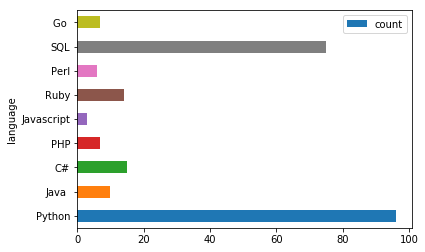

In [46]:
# language_df.plot(kind='bar')
language_df.plot.barh(x='language', y='count')

In [47]:
language_requirement = sorted(language_dict.items(), key=lambda item:item[1], reverse=True)
language_requirement

[('Python', 96),
 ('SQL', 75),
 ('C#', 15),
 ('Ruby', 14),
 ('Java ', 10),
 ('PHP', 7),
 ('Go ', 7),
 ('Perl', 6),
 ('Javascript', 3)]